### Faculty Of Computers & Artificial Intelligence - Cairo University
### Supervised Learning, Assignment 2
### Proudly Done By
## Khaled Waleed 20210127
## Mohammed Mohsen 20210353
### Date 20-Mar-2024

In [2]:
# imports
import cupy as np # Using cupy instead of numpy to allow for use of graphics card if needed (it's overkill I know) but still calling it np to easily switch later if needed since they are interchangeable
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## My brief Derivation of the best-fit line parameters formula (I used my own equation)
### This is only for 1 input just because I want to derive the equation myself from the ground up

Assume the optimal line is

>$\LARGE \hat{y} = m \cdot x_i + c$


The Loss (error) function will be
>$\LARGE
E = \sum ((m x_i + c) - y_i) ^ 2
$


After Taking the derivative on both variables of the optimal line (m, c) and assigning them with 0 , we will have two equations

Equation number 1
>$\LARGE
\sum (m x_i + c - y_i) \cdot x_i = 0
$

Equation number 2
>$\LARGE
\sum m x_i + c - y_i = 0
$


By distributing the sum over all terms of equation 2, we end up with the following
>$\LARGE
\sum m x_i + \sum c = \sum y_i
$

>$\LARGE
m \sum x_i + n c = \sum y_i
$

Dividing by n
>$\LARGE
m (\sum x_i ) / n + c = (\sum y_i) / n
$

>$\LARGE
m \bar x + n = \bar y
$

Note: bar here means average


Call the following equation 3, which is very important
>$\LARGE c = \bar y - m \bar x$


Substituting equation 3 in equation 2
>$\LARGE m \sum x_i^2 + (\bar y - m \bar x) \sum x_i = \sum y_i x_i
$

Putting m in one side, call this equation 4
>$\LARGE m = \frac{\sum y_i x_i - \bar y \sum x_i}{\sum x_i^2 - \bar x \sum x_i}$


Now you can simply use equation 3 and 4 to calculate the parameters of the best fit line directly :)

In [3]:
# Generating dummy data
np.random.seed(563)
x_training = np.random.uniform(size=5, low=0, high= 5) # Random 5 Points
y_training = np.array(17 * x_training + 5) # Random Ground-Truth equation

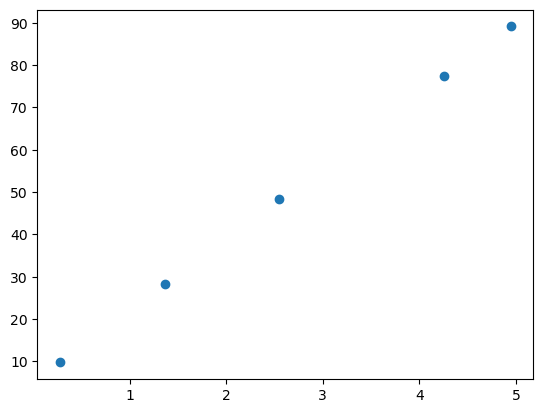

In [4]:
# Plotting the data
plt.plot(x_training.get(), y_training.get(), 'o')
plt.show()

$$\LARGE m = \frac{\sum y_i x_i - \bar y \sum x_i}{\sum x_i^2 - \bar x \sum x_i}$$

$$\huge c = \bar y - m \bar x$$

In [5]:
# Training
def calculate_m(x, y):
    return ((np.sum(y * x) - np.average(y) * np.sum(x)) /
            (np.sum(x ** 2) - np.average(x) * np.sum(x)))

def calculate_c(x, y, m):
    return np.average(y) - m * np.average(x)

m = calculate_m(x_training, y_training)
c = calculate_c(x_training, y_training, m)

In [6]:
# Testing
y_predicted = m * x_training + c

print(y_training)
print(y_predicted)

[28.20609339 48.31749087 77.3845756   9.7428813  89.11969115]
[28.20609339 48.31749087 77.3845756   9.7428813  89.11969115]


In [7]:
# Adding Noise to Data
noise_limit = np.average(y_training) / 2
y_training_noisy = np.array([x_i + np.random.uniform(low=-noise_limit, high=noise_limit) for x_i in y_training]) # adding random value to every point in x

In [8]:
# Re-Training with noisy data
m_noisy = calculate_m(x_training, y_training_noisy)
c_noisy = calculate_c(x_training, y_training_noisy, m_noisy)

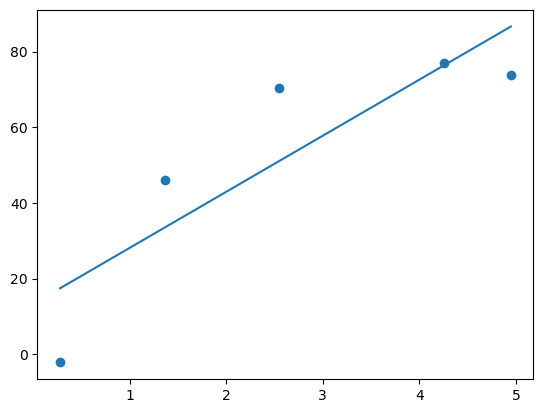

In [9]:
# Re-Testing with noisy data
y_predicted_noisy = m_noisy * x_training + c_noisy

#plotting the data
plt.scatter(x_training.get(), y_training_noisy.get())
x_line = np.linspace(min(x_training), max(x_training), 100)
plt.plot(x_line.get(), (m_noisy * x_line + c_noisy).get())

### This Time with Generalized Linear Algebra formula to support more than 2 dimensions

In [10]:
# Data Preparing
iris = load_iris()
x_iris = iris.data
y_iris = iris.target

y_iris[y_iris == 2] = 1 # Grouping class 2, 3 together

# Splitting the data into 2 classes
x_iris_class1 = x_iris[y_iris == 0]
x_iris_class2 = x_iris[y_iris == 1]


# grouping the data with specific requirements
x_iris_training = np.vstack((x_iris_class1[10:], x_iris_class2[20:]))
y_iris_training = np.array([-1] * 40 + [1] * 80)

x_iris_testing = np.vstack((x_iris_class1[:10], x_iris_class2[:20]))
y_iris_testing = np.array([-1] * 10 + [1] * 20)

In [11]:
weights = np.linalg.inv(np.transpose(x_iris_training) @ x_iris_training) @ np.transpose(x_iris_training) @ y_iris_training

y_iris_prediction = x_iris_testing @ weights

y_iris_prediction = np.where(y_iris_prediction > 0, 1, -1)

acc = y_iris_testing * y_iris_prediction
print(f"Accuracy = {len(acc[acc == 1]) / len(acc)}") # nailed it :)

Accuracy = 1.0
